In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import dlib

In [49]:
input_image_1 = cv2.imread(r'joker.jpg')
input_image_2 = cv2.imread(r'joker2.jpeg')

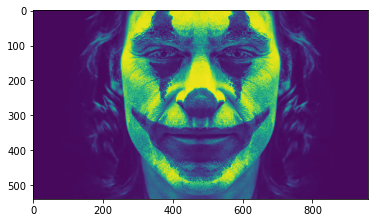

In [50]:
gray_1 = cv2.cvtColor(input_image_1,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_1)

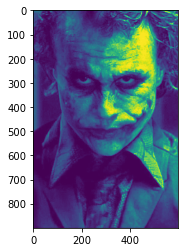

In [51]:
gray_2 = cv2.cvtColor(input_image_2,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_2)

In [52]:
## Finding landmarks
pred_path = r'..\TF\OpenCV\Master OpenCV\shape_predictor_68_face_landmarks.dat'
predictor = dlib.shape_predictor(pred_path)
detector = dlib.get_frontal_face_detector()

In [53]:
## Finding landmarks on the images
def get_landmarks(input_image):
    marks = detector(input_image,1)
    for face in marks:
        landmarks = predictor(input_image,face)
        landmark_points = []
        for i in range(0,68):
            x = landmarks.part(i).x
            y = landmarks.part(i).y
            landmark_points.append((x,y))
    return np.matrix(landmark_points)

In [54]:
def annotate_marks(image,landmarks):
    image = image.copy()
    for idx, point in enumerate(landmarks):
        pos = (point[0,0],point[0,1])
        cv2.putText(image,str(idx),pos,
        fontFace = cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,fontScale = 0.4, color = 255)
        cv2.circle(image,pos,3,color = (0,255,255))
    return image

In [62]:
marks = get_landmarks(input_image_1)

In [63]:
image = annotate_marks(input_image_1,marks)

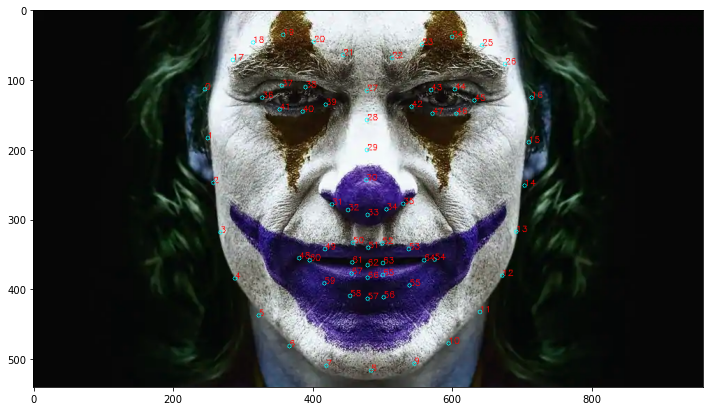

In [64]:
plt.figure(figsize = (12,10))
plt.imshow(image)

In [68]:
### Source image triangulation
def triangulate_image(landmarks):
    convexhull = cv2.convexHull(landmarks)
    rect = cv2.boundingRect(convexhull)
    subdiv = cv2.Subdiv2D(rect)
    subdiv.insert(landmarks)
    triangles = subdiv.getTriangleList()
    triangles = np.array(triangles,dtype=np.int32)
    return triangles

In [69]:
source_triangles = triangulate_image(marks)